<a href="https://colab.research.google.com/github/akhils-codes1/random_vs_des/blob/main/des_ecb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.8/232.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.7 MB/s eta 0:00:00


In [3]:
from fastai.vision.all import *
import timm

In [4]:
!ls /content/gdrive/MyDrive/des_ebc

des_ecb.csv	    des_ecb.ipynb  new.png  pgm  png_dsc_128.zip  png_my.zip
des_ecb_imgs.ipynb  new.csv	   new.pnm  png  png_dsc_all.zip


In [5]:
%cd /content/gdrive/MyDrive/des_ebc

/content/gdrive/MyDrive/des_ebc


In [6]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()
  return learn

In [7]:
filename = 'png_my.zip'

In [10]:
_s = f'/content/gdrive/MyDrive/des_ebc/{filename}'

In [11]:
!ls {_s}

/content/gdrive/MyDrive/des_ebc/png_my.zip


### My approach

Archive:  /content/gdrive/MyDrive/des_ebc/png_my.zip
   creating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_1.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_2.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_3.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_4.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_6.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_9.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_10.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_15.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_16.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_18.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_20.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/png_my/0_28.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_my/p

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


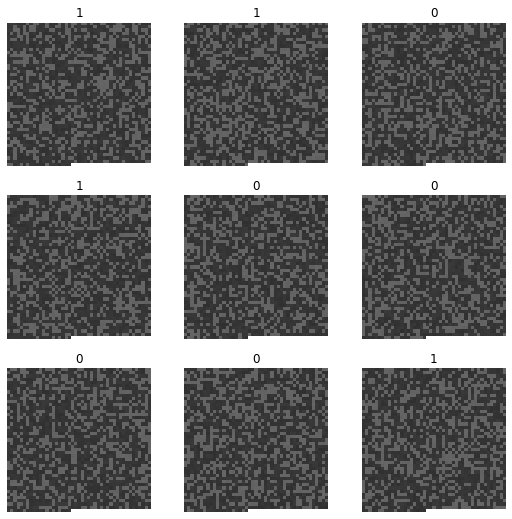

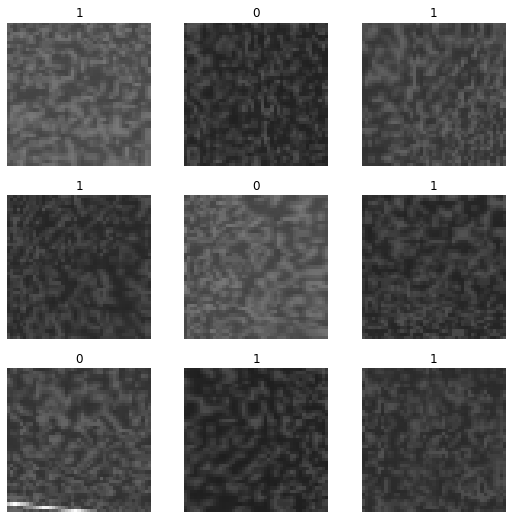

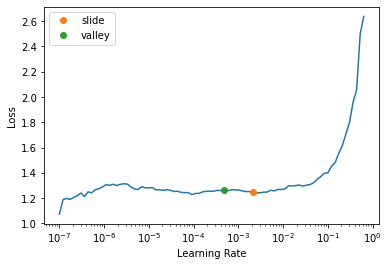

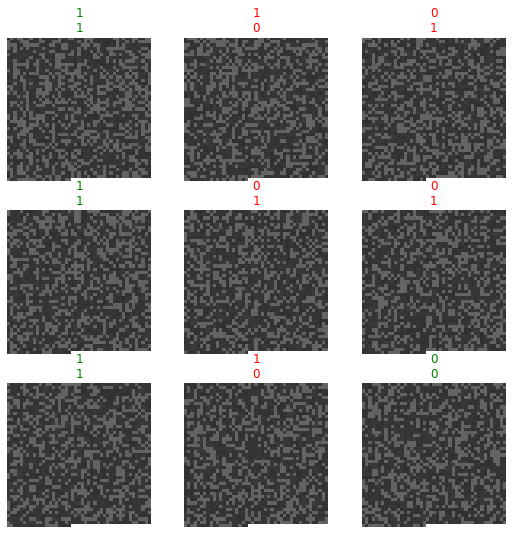

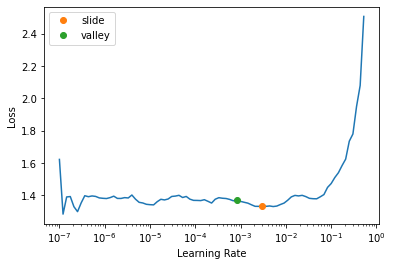

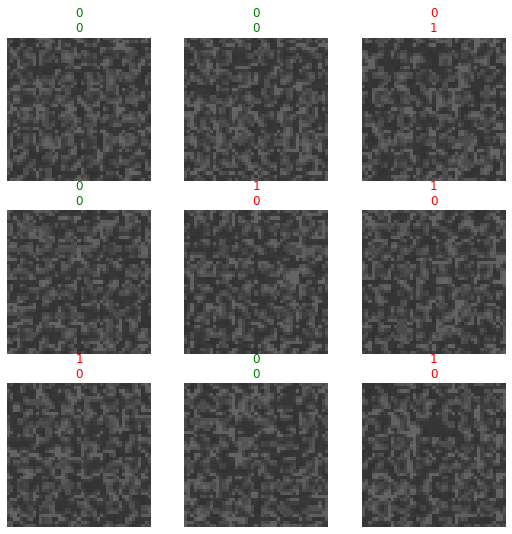

In [12]:
filename = 'png_my.zip'
from_file = f'/content/gdrive/MyDrive/des_ebc/{filename}'
to_file = f'/content/gdrive/MyDrive/des_ebc/{filename[:-4]}'
!unzip '{from_file}' -d '{to_file}'
path = Path('/content/gdrive/MyDrive/des_ebc/'+filename[:-4])
files = get_image_files(path)
files[0]
len(files)
pat = r'^(.*)_\d+.png'
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()
densenet_1 = runit(dls1, 'densenet121', 10)
densenet_2 = runit(dls2, 'densenet121', 10)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


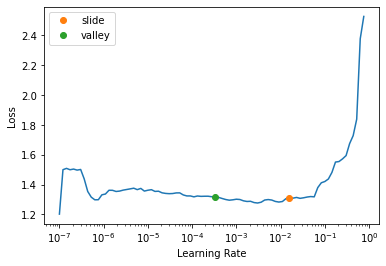

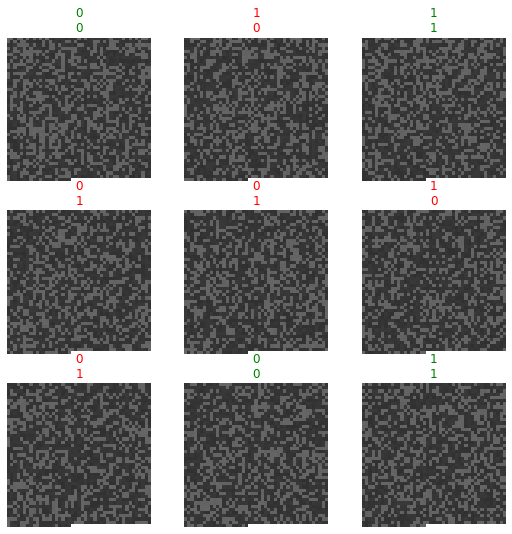

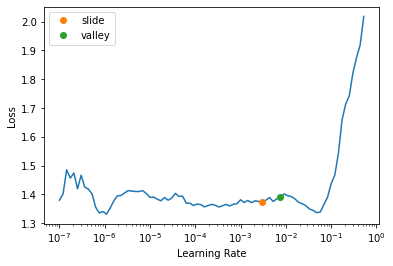

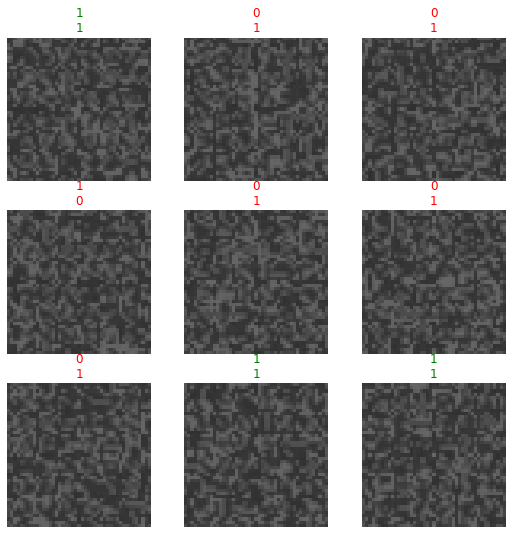

In [13]:
cn1 = runit(dls1, 'convnext_nano', 10)
cn2 = runit(dls2, 'convnext_nano', 10)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


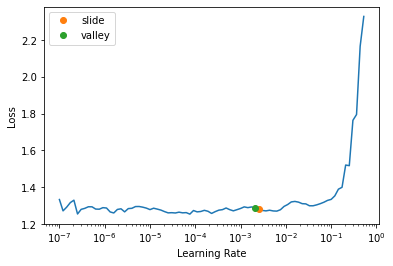

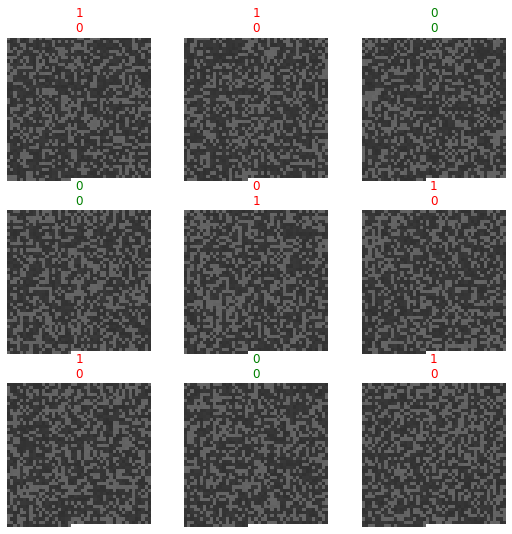

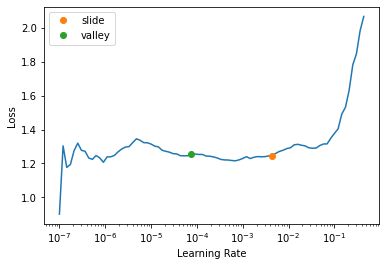

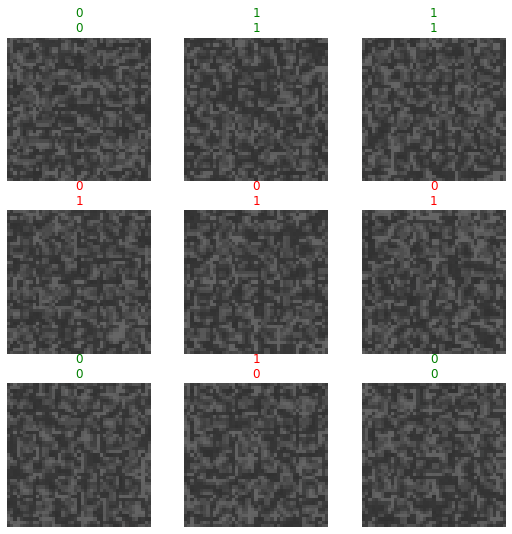

In [14]:
dn1 = runit(dls1, 'darknet53', 10)
dn2 = runit(dls2, 'darknet53', 10)

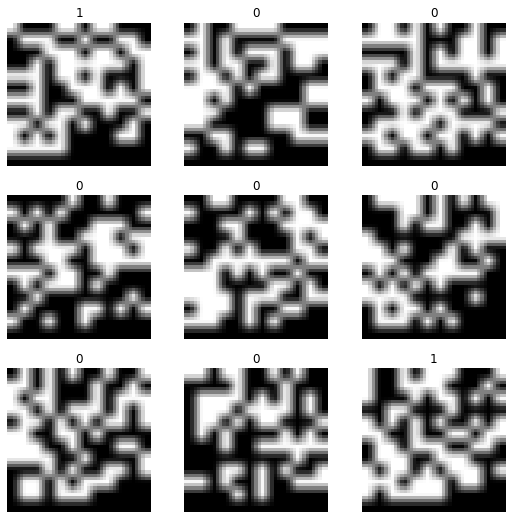

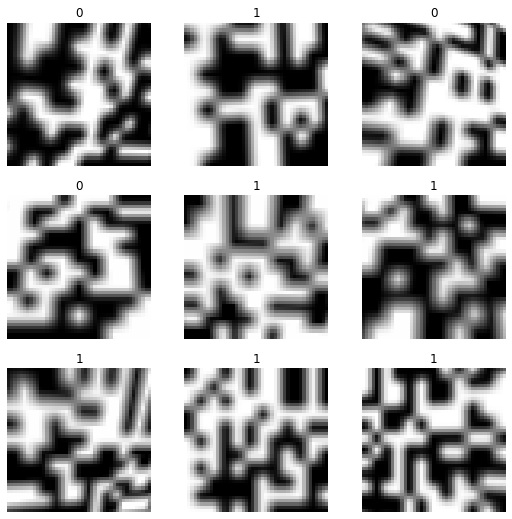

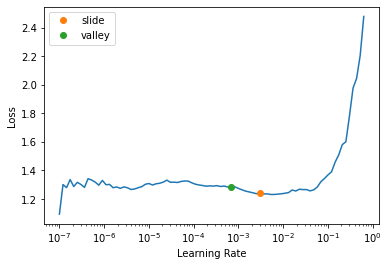

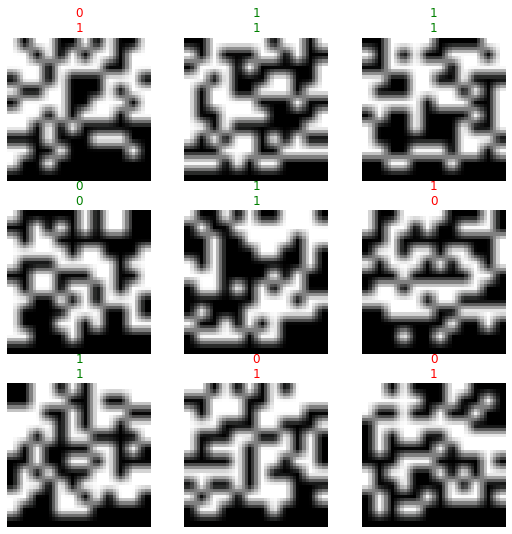

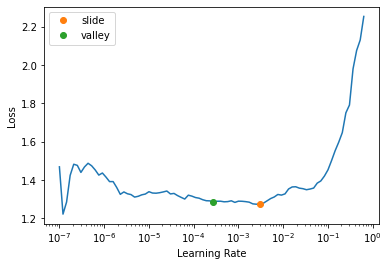

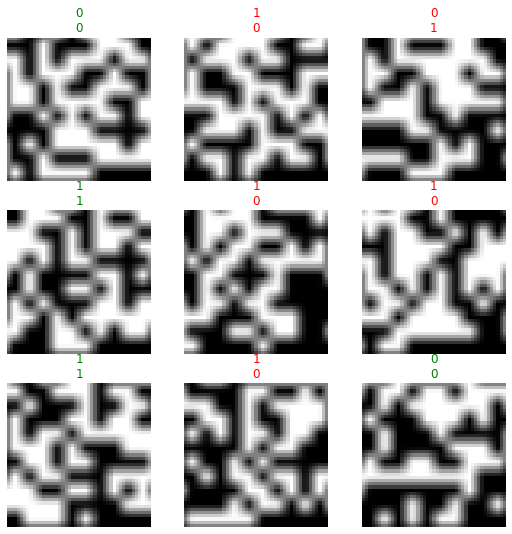

In [16]:
filename1 = 'png_dsc_128.zip'
from_file = f'/content/gdrive/MyDrive/des_ebc/{filename1}'
to_file = f'/content/gdrive/MyDrive/des_ebc/{filename1[:-4]}'
# !unzip '{from_file}' -d '{to_file}'
path = Path('/content/gdrive/MyDrive/des_ebc/'+filename1[:-4])
files = get_image_files(path)
files[0]
len(files)
pat = r'^(.*)_\d+.png'
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()
densenet_1 = runit(dls1, 'densenet121', 10)
densenet_2 = runit(dls2, 'densenet121', 10)

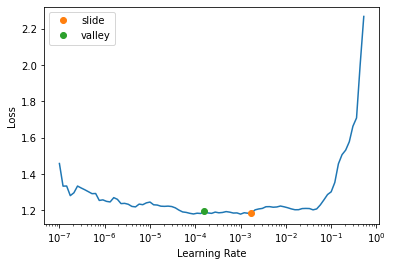

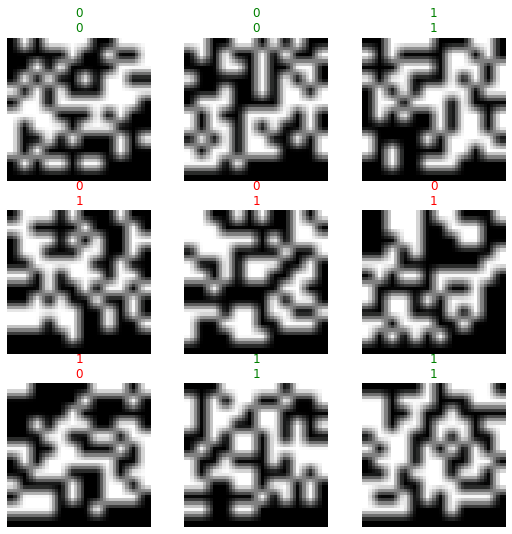

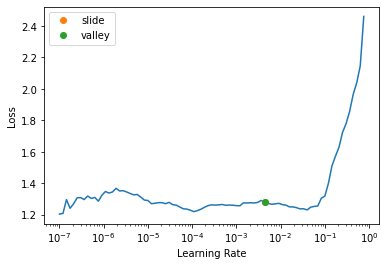

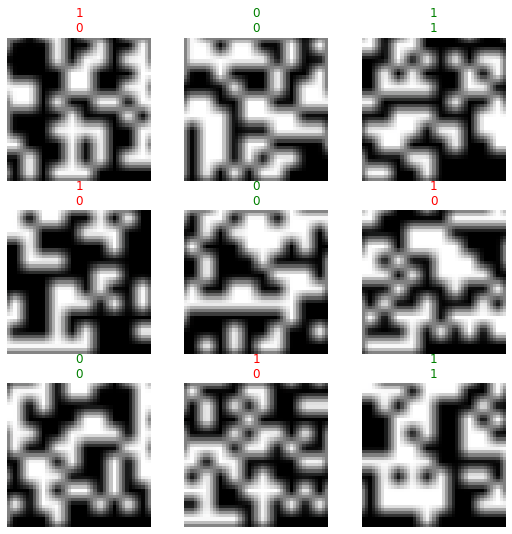

In [17]:
cn1 = runit(dls1, 'convnext_nano', 10)
cn2 = runit(dls2, 'convnext_nano', 10)

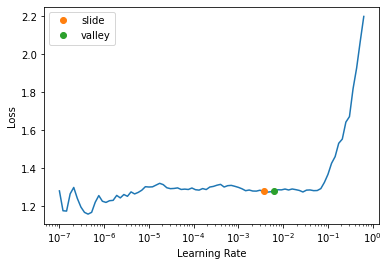

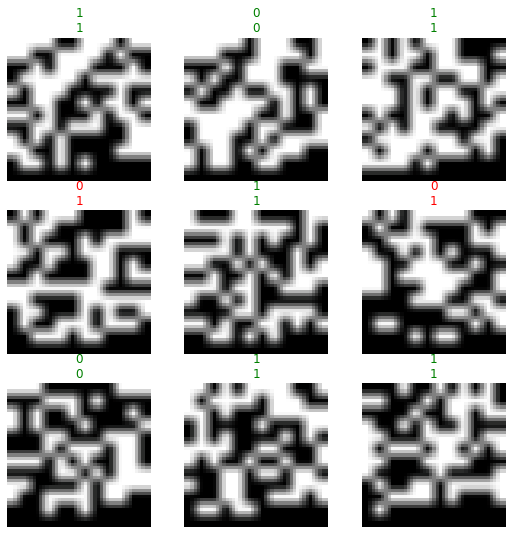

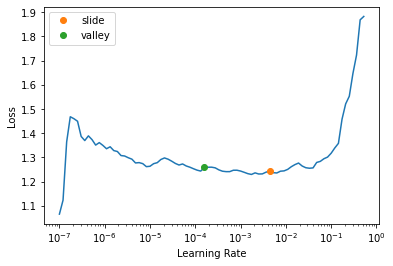

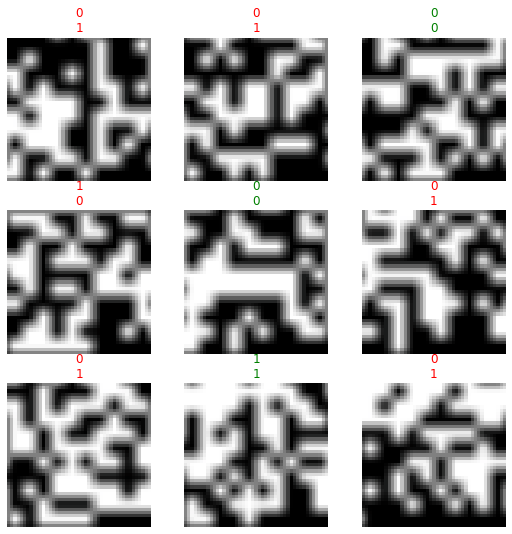

In [18]:
dn1 = runit(dls1, 'darknet53', 10)
dn2 = runit(dls2, 'darknet53', 10)

Archive:  /content/gdrive/MyDrive/des_ebc/png_dsc_all.zip
   creating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_1.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_2.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_3.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_4.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_6.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_9.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_10.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_15.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_16.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_18.png  
  inflating: /content/gdrive/MyDrive/des_ebc/png_dsc_all/png_dsc_all/0_20.png 

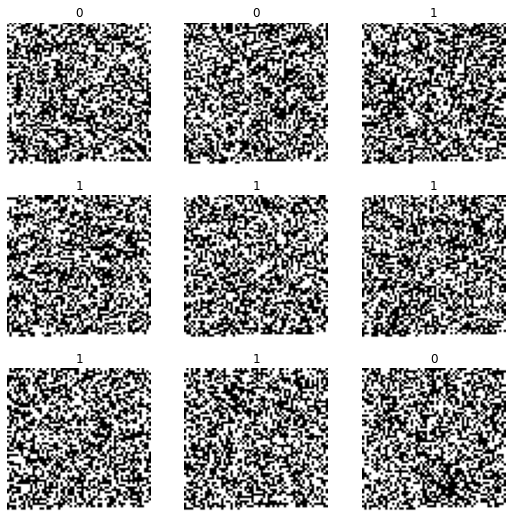

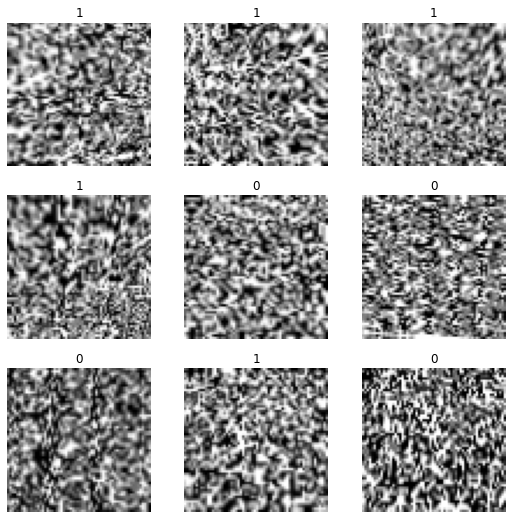

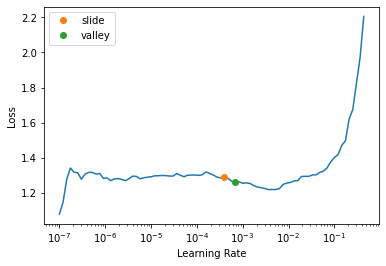

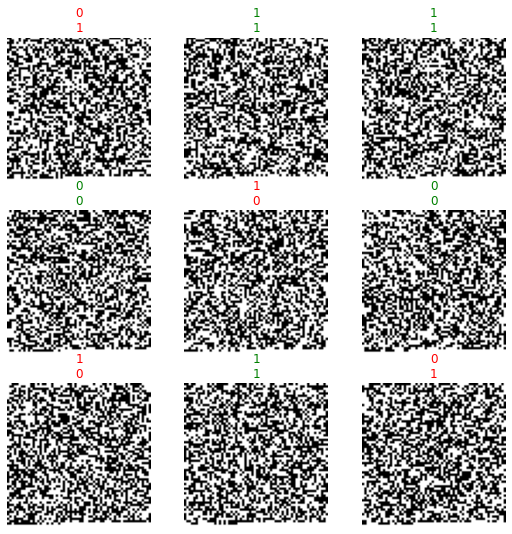

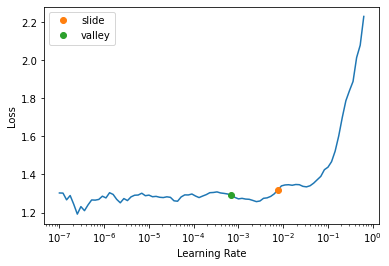

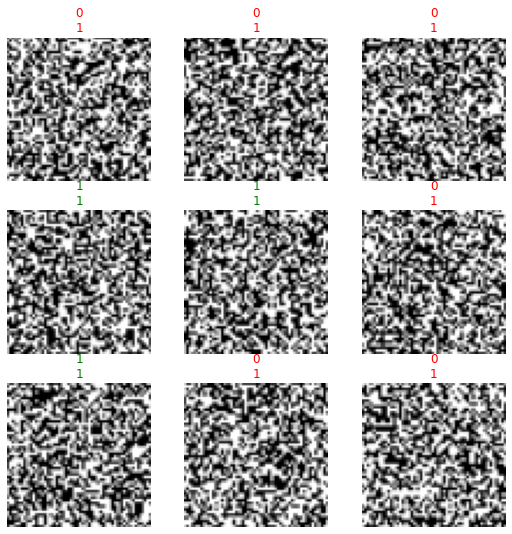

In [19]:
filename = 'png_dsc_all.zip'
from_file = f'/content/gdrive/MyDrive/des_ebc/{filename}'
to_file = f'/content/gdrive/MyDrive/des_ebc/{filename[:-4]}'
!unzip '{from_file}' -d '{to_file}'
path = Path('/content/gdrive/MyDrive/des_ebc/'+filename[:-4])
files = get_image_files(path)
files[0]
len(files)
pat = r'^(.*)_\d+.png'
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(62))
dls1.show_batch()
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(62, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()
densenet_1 = runit(dls1, 'densenet121', 10)
densenet_2 = runit(dls2, 'densenet121', 10)

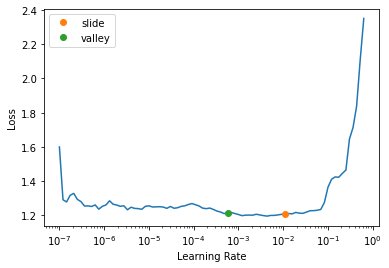

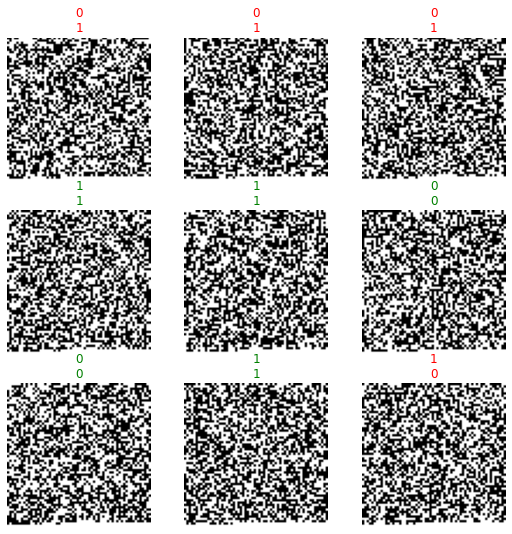

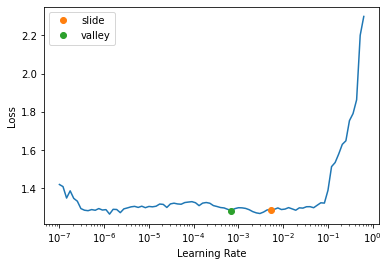

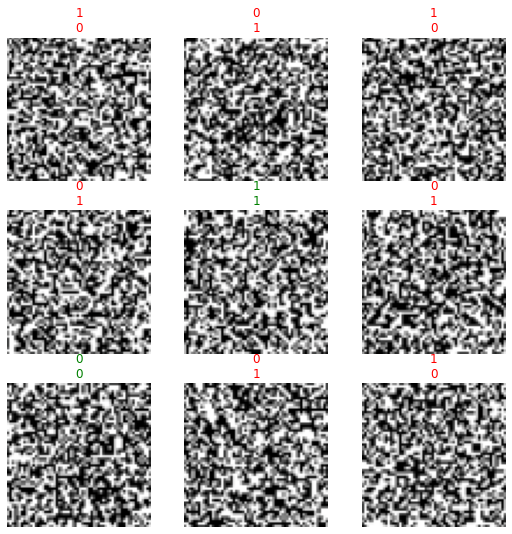

In [20]:
cn1 = runit(dls1, 'convnext_nano', 10)
cn2 = runit(dls2, 'convnext_nano', 10)

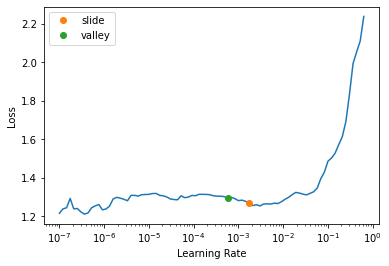

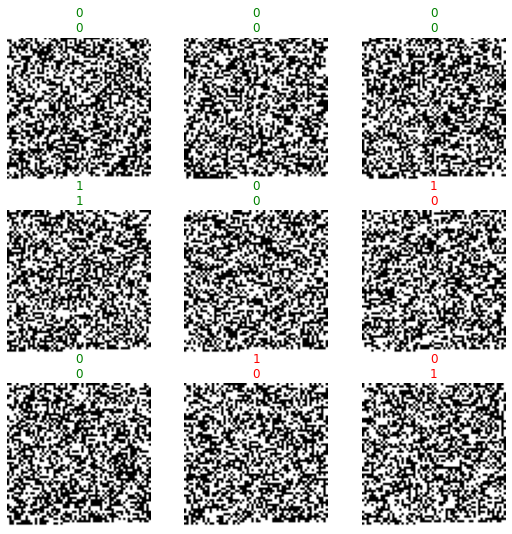

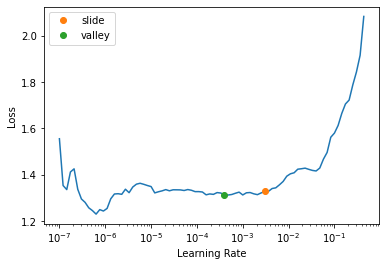

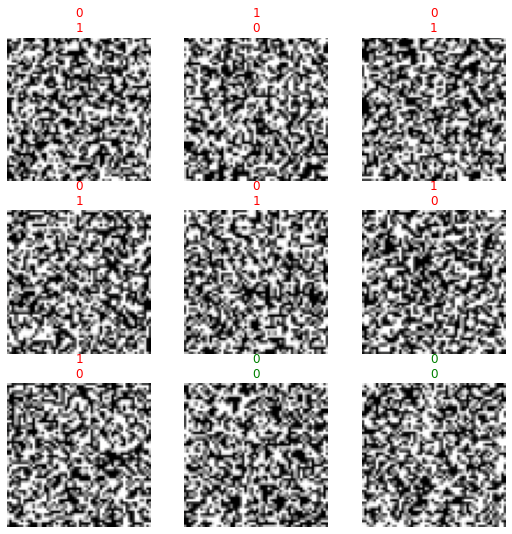

In [21]:
dn1 = runit(dls1, 'darknet53', 10)
dn2 = runit(dls2, 'darknet53', 10)